# Home work 1 - STA 221
**Zhikuan Quan (917800911)**

**Bohao Zou(917796070)**

## 0. Import Packages

In [19]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pyreadr

## 1. True or False?
**(a) A rectangular matrix of size n $\times$ m is a linear transformation.**<br/>
True. It is a linear transformation to a vector by definition.<br/>
**(b) Only square matrices have Eigenvalue decompositions.** <br/>
True. Since the definition of an eigenvalue is only for square matrices.If A is not a square matrix, for example, the dimension of A is $m\times n$, then Ax is the dimension m x 1. but the dimension of $\lambda$x shoule be n x 1 <br/>
**(c) Power Method can be used to find only eigenvectors (and not singular vectors)**<br/>
False. Power methods can also be used to compute singular value decomposition.<br/>
**(d) Singular vectors are orthogonal to each other.**<br/>
False. Only left singular vetors are orthogonal to lefe sigular vetors, and the right ones are orthogonal to the right..<br/>
**(e) Kernel PCA is a linear dimension reduction technique.** <br/>
False. It is non-linear with diverse kernel function.<br/>
**(f) Spectral Clustering is a non-linear dimension reduction technique.** <br/>
True. It is by definition with non-convex curve.

## 2. Python practice via statistical concepts

In [9]:
# Generate the sample mean
dict = {}
random.seed(13)
N = 10000
n = [10, 100, 1000, 10000]
for iter in n:
    npoint = np.random.rand(N, iter)
    npoint[npoint < 0.5] = -1
    npoint[npoint >= 0.5] = 1
    dict[str(iter)+'_mean'] = np.mean(npoint, axis=1)


### (a) $log_{10} (n)$  vs $\bar{X}_n - \mu$

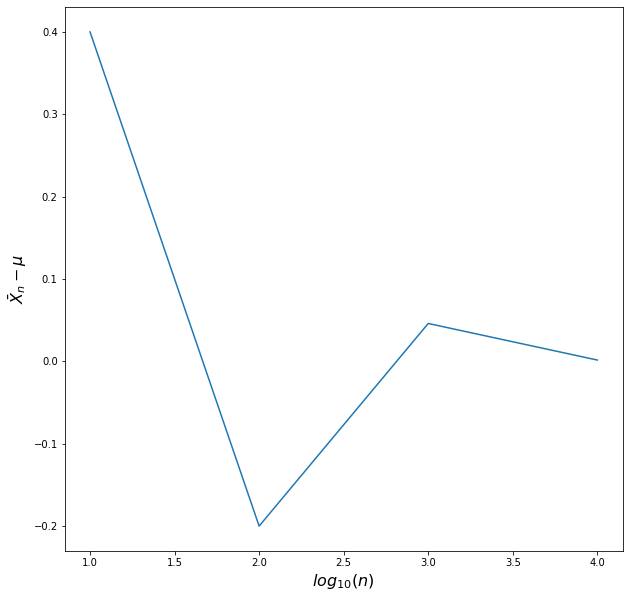

In [86]:
a_data_y = [dict[str(y) +'_mean'][0] for y in n]
a_data_x = [math.log10(x) for x in n]

sns.lineplot(x = a_data_x, y = a_data_y)
plt.xlabel(r'$log_{10} (n)$', fontsize=16)
plt.ylabel(r'$\bar{X}_n - \mu$', fontsize=16)
plt.show()

**It shows that the deviation $\bar{X}_n - \mu $ converges to 0 as n increases.**

### (b) $log_{10} (n)$  vs  $\frac{1}{N}\sum_{i=1}^N 1\{|\bar{X}_n^{(i)} - \mu|>\epsilon\}$

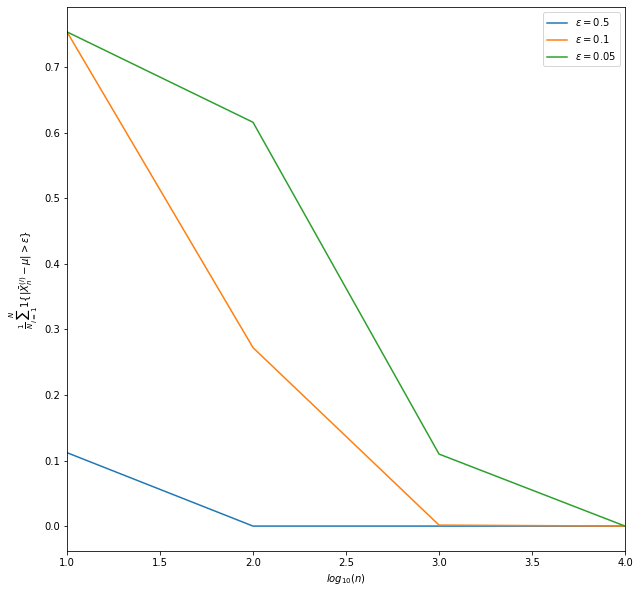

In [85]:
b_data_y_05= []
b_data_y_01= []
b_data_y_005= []
for i in range(N):
    np.array(b_data_y_05.append([abs(dict[str(y) +'_mean'][i]) > 0.5 for y in n]))
    np.array(b_data_y_01.append([abs(dict[str(y) +'_mean'][i]) > 0.1 for y in n]))
    np.array(b_data_y_005.append([abs(dict[str(y) +'_mean'][i]) > 0.05 for y in n]))
b_data = pd.DataFrame({'x':a_data_x,
                       r'$\epsilon = 0.5$':np.sum(b_data_y_05,axis =0)/N,
                       r'$\epsilon = 0.1$':np.sum(b_data_y_01,axis =0)/N,
                       r'$\epsilon = 0.05$':np.sum(b_data_y_005,axis =0)/N})
b_data.plot(x='x')
plt.xlabel(r'$log_{10} (n)$', fontsize=10)
plt.ylabel(r'$\frac{1}{N}\sum_{i=1}^N 1\{|\bar{X}_n^{(i)} - \mu|>\epsilon\}$', fontsize=10)
plt.show()

### (c) Histogram

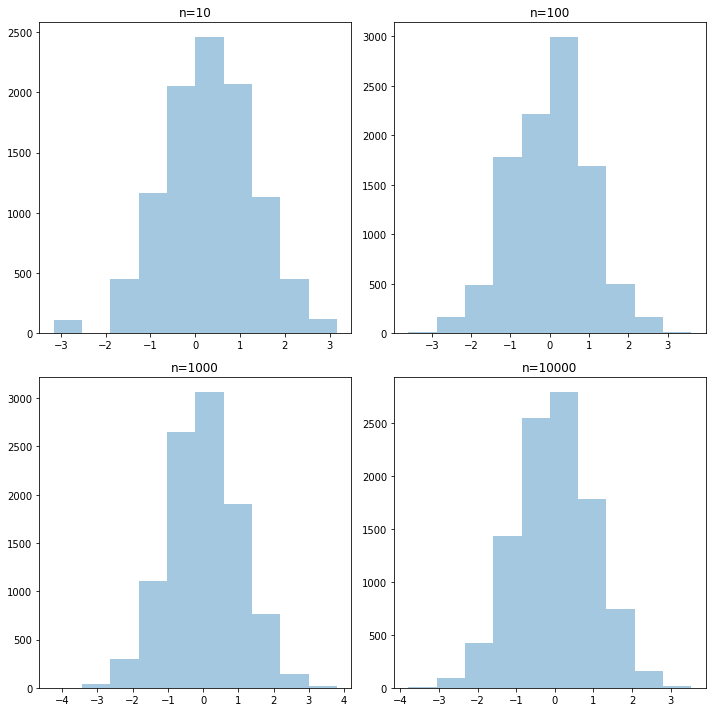

In [84]:
c_data = [dict[str(y) +'_mean']*math.sqrt(y) for y in n]
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False)
sns.distplot(c_data[0],bins=10,kde=False,ax=ax[0,0]).set(title='n=10')
sns.distplot(c_data[1],bins=10,kde=False,ax=ax[0,1]).set_title('n=100')
sns.distplot(c_data[2],bins=10,kde=False,ax=ax[1,0]).set(title='n=1000')
sns.distplot(c_data[3],bins=10,kde=False,ax=ax[1,1]).set(title='n=10000')
plt.tight_layout()
plt.show()

**This plot illustrates the Central Limit Theorem: as n becomes bigger, the distribution tends to be normal.**

## 3. Amazon Review Analysis

### (a) Aquaire all documents in reviews.

In [3]:
import pyreadr
# use pyreadr to input data
amazonData = pyreadr.read_r('./Amazon.RData')
review_data = list(amazonData["dat"]["review"])

### (b) Fix the words in our dictinoary

In [13]:
from nltk.stem.snowball import FrenchStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
stemmer = FrenchStemmer()
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc): return (stemmer.stem(w) for w in analyzer(doc))

### (c) Document-Term matrix

In [14]:
countObj = CountVectorizer(analyzer=stemmed_words)
countX = countObj.fit_transform(stemmed_data)
doc_count_matrix = countX.toarray()

In [15]:
doc_count_matrix.shape

(1312, 5186)

### (d) TF-IDF matrix

In [16]:
tfidfObj = TfidfVectorizer(token_pattern="[a-z]{3,15}")
tfidfX = tfidfObj.fit_transform(stemmed_data)
doc_tfidf_matrix = tfidfX.toarray()

In [17]:
doc_tfidf_matrix.shape

(1312, 5806)

### (e) Rating values

In [20]:
rating_value = [int(v) for v in list(amazonData["dat"]["rating"])]
number_of_rating_value = np.unique(rating_value)
print("There are " + str(len(number_of_rating_value)) + " rating value in this data set.")
for v in number_of_rating_value:
    print("The number reviews of " + str(v) + " rating is")
    print(len(np.where(np.array(rating_value) == v)[0]))

There are 2 rating value in this data set.
The number reviews of 1 rating is
656
The number reviews of 5 rating is
656


### (f) PCA and Kernel PCA

In [21]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
pca = PCA(n_components=2)
kpca = KernelPCA(n_components=2,kernel="cosine",max_iter=100000)
pca_count_fitted = pca.fit_transform(doc_count_matrix)
#print(pca_count_fitted.shape)
pca_iditf_fitted = pca.fit_transform(doc_tfidf_matrix)
#print(pca_iditf_fitted.shape)
kpca_count_fitted = kpca.fit_transform(doc_count_matrix)
#print(kpca_count_fitted.shape)
kpca_iditf_fitted = kpca.fit_transform(doc_tfidf_matrix)
#print(kpca_iditf_fitted.shape)

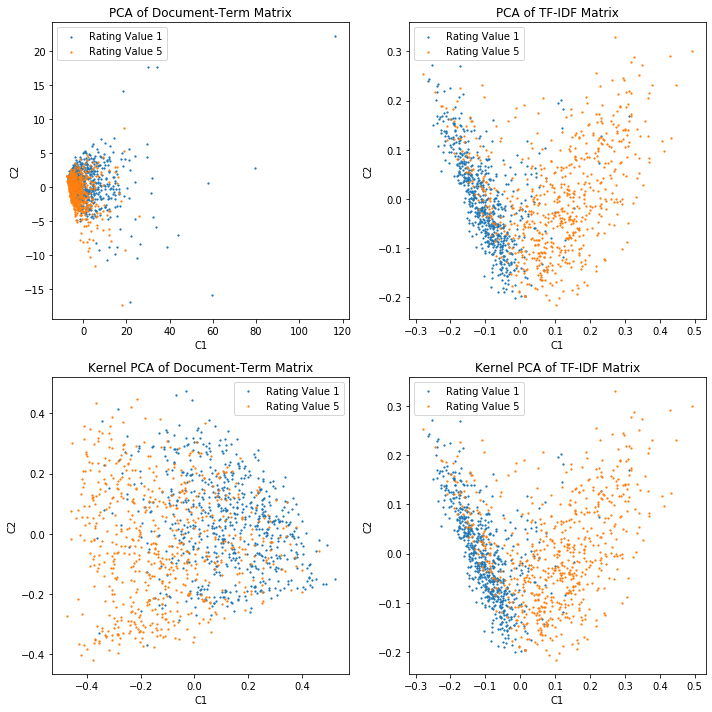

In [22]:
plt.rcParams["figure.figsize"] = (10,10)

fig, ax = plt.subplots(2, 2, sharex=False, sharey=False)
ax[0,0].scatter(x = pca_count_fitted[0:657,0],y=pca_count_fitted[0:657,1],label = "Rating Value 1",s = 1.5)
ax[0,0].scatter(x = pca_count_fitted[657:,0],y=pca_count_fitted[657:,1],label = "Rating Value 5", s = 1.5)
ax[0,0].set(xlabel="C1",ylabel="C2",title="PCA of Document-Term Matrix")
ax[0,0].legend()

ax[0,1].scatter(x = pca_iditf_fitted[0:657,0],y=pca_iditf_fitted[0:657,1],label = "Rating Value 1",s = 1.5)
ax[0,1].scatter(x = pca_iditf_fitted[657:,0],y=pca_iditf_fitted[657:,1],label = "Rating Value 5",s = 1.5)
ax[0,1].set(xlabel="C1",ylabel="C2",title="PCA of TF-IDF Matrix")
ax[0,1].legend()

ax[1,0].scatter(x = kpca_count_fitted[0:657,0],y=kpca_count_fitted[0:657,1],label = "Rating Value 1",s = 1.5)
ax[1,0].scatter(x = kpca_count_fitted[657:,0],y=kpca_count_fitted[657:,1],label = "Rating Value 5",s = 1.5)
ax[1,0].set(xlabel="C1",ylabel="C2",title="Kernel PCA of Document-Term Matrix")
ax[1,0].legend()

ax[1,1].scatter(x = kpca_iditf_fitted[0:657,0],y=kpca_iditf_fitted[0:657,1],label = "Rating Value 1",s = 1.5)
ax[1,1].scatter(x = kpca_iditf_fitted[657:,0],y=kpca_iditf_fitted[657:,1],label = "Rating Value 5",s = 1.5)
ax[1,1].set(xlabel="C1",ylabel="C2",title="Kernel PCA of TF-IDF Matrix")
ax[1,1].legend()

plt.tight_layout()

plt.show()

**The plots above show the result of PCA and Kernel PCA. For the Document-Term Matrix, it seems that they are overlapped for two clusters. However, both PCA and Kernel PCA can seperate the clusters in TF-IDF Matrix.**

### (g) K-means and Spectral clustering

In [23]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
k_mean = KMeans(n_clusters=2,n_init=200,max_iter=2000,random_state=150)
spc = SpectralClustering(n_clusters=2,assign_labels="discretize",n_init=500,affinity="rbf",random_state=100)

k_mean_count = k_mean.fit_predict(doc_count_matrix)
k_mean_tfidf = k_mean.fit_predict(doc_tfidf_matrix)

spc_count = spc.fit_predict(doc_count_matrix)
spc_tfidf = spc.fit_predict(doc_tfidf_matrix)

import sklearn.metrics as matrics

y_true = np.where(np.array(rating_value) == 5,0,1)

acc_kmean_count = matrics.accuracy_score(y_pred=k_mean_count,y_true=y_true)
cf = matrics.confusion_matrix(y_true,k_mean_count)
print("ACC of K Mean with count matrix ",acc_kmean_count)
print("The confusion matrix of kmean with count document, tn : %d , fp : %d , fn : %d , tp : %d" % (cf[0,0],cf[0,1],cf[1,0],cf[1,1]))

acc_kmean_tfidf = matrics.accuracy_score(y_pred=k_mean_tfidf,y_true=y_true)
print("ACC of K Mean with Tf-Idf matrix ",acc_kmean_tfidf)
cf = matrics.confusion_matrix(y_true,k_mean_tfidf)
print("The confusion matrix of kmean with Tf-Idf document, tn : %d , fp : %d , fn : %d , tp : %d" % (cf[0,0],cf[0,1],cf[1,0],cf[1,1]))

acc_spc_count = matrics.accuracy_score(y_pred=spc_count,y_true=y_true)
print("ACC of Spectral clustering with count matrix ",acc_spc_count)
cf = matrics.confusion_matrix(y_true,spc_count)
print("The confusion matrix of Spectral Clustering with count document, tn : %d , fp : %d , fn : %d , tp : %d" % (cf[0,0],cf[0,1],cf[1,0],cf[1,1]))

acc_spc_tfidf = matrics.accuracy_score(y_pred=spc_tfidf,y_true=y_true)
print("ACC of Spectral clustering with Tf-Idf matrix ",acc_spc_tfidf)
cf = matrics.confusion_matrix(y_true,spc_tfidf)
print("The confusion matrix of Spectral Clustering with Tf-Idf document, tn : %d , fp : %d , fn : %d , tp : %d" % (cf[0,0],cf[0,1],cf[1,0],cf[1,1]))

C:\Users\REAY\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


ACC of K Mean with count matrix  0.4268292682926829
The confusion matrix of kmean with count document, tn : 32 , fp : 624 , fn : 128 , tp : 528
ACC of K Mean with Tf-Idf matrix  0.8353658536585366
The confusion matrix of kmean with Tf-Idf document, tn : 469 , fp : 187 , fn : 29 , tp : 627
ACC of Spectral clustering with count matrix  0.5541158536585366
The confusion matrix of Spectral Clustering with count document, tn : 535 , fp : 121 , fn : 464 , tp : 192
ACC of Spectral clustering with Tf-Idf matrix  0.836890243902439
The confusion matrix of Spectral Clustering with Tf-Idf document, tn : 475 , fp : 181 , fn : 33 , tp : 623
